Imports

In [ ]:
!pip install pmdarima

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go


import pmdarima as pm
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00


In [ ]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/consumo.csv')


EDA

In [ ]:
data = df[['Consumo de cerveja (litros)']]
data.index = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
dias = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado","Domingo"]
df["Dia"]=df["Data"].apply(lambda a : dias[a.weekday()])
# dia_encoder = LabelEncoder()
# df["Dia_Num"] = dia_encoder.fit_transform(df["Dia"])+ 1

meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
df["Mes"]=df["Data"].apply(lambda a : meses[a.month-1])
# mes_encoder = LabelEncoder()
# df["Mes_Num"] = mes_encoder.fit_transform(df["Mes"])+ 1

In [ ]:
df.columns = ['Data', 'T_Media', 'T_Min', 'T_Max', 'Precipitacao', 'Fds', 'Consumo', 'Dia', 'Mes']

In [ ]:
df['T_Media'] = df['T_Media'].str.replace(',', '.').astype('float')
df['T_Min'] = df['T_Min'].str.replace(',', '.').astype('float')
df['T_Max'] = df['T_Max'].str.replace(',', '.').astype('float')
df['Precipitacao'] = df['Precipitacao'].str.replace(',', '.').astype('float')
df['Fds'] = df['Fds'].astype('int')

In [ ]:
df.head()

,Data,T_Media,T_Min,T_Max,Precipitacao,Fds,Consumo,Dia,Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Quinta,Janeiro
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Sexta,Janeiro
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Sábado,Janeiro
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Domingo,Janeiro
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Segunda,Janeiro


<ipython-input-10-c912f34fd807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: >

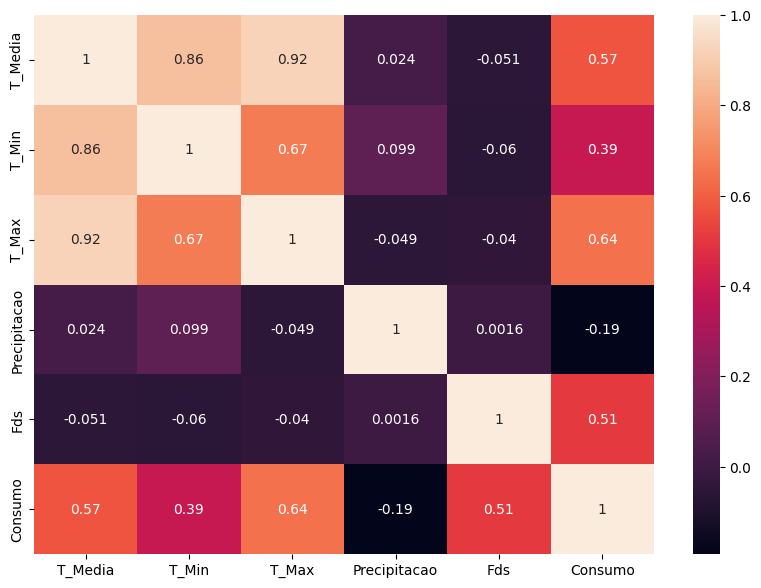

In [ ]:
correlacao = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, annot=True)

In [ ]:
df["Data"]

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

In [ ]:
df_consumo_semana = df.groupby(df['Fds'], as_index=False).mean()
df_consumo_semana

<ipython-input-12-1882bc57a036>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_consumo_semana = df.groupby(df['Fds'], as_index=False).mean()


,Fds,T_Media,T_Min,T_Max,Precipitacao,Consumo
0,0,21.328199,17.567433,26.721073,5.184291,23.998222
1,1,20.970769,17.195192,26.336538,5.227885,28.922721


In [ ]:
weekdays = sum(df[df.Fds == 0]['Consumo'])
weekend = sum(df[df.Fds==1]['Consumo'])

labels = ['Weekdays','Weekend']
values = [weekdays, weekend]
colors = ['crimson']

fig = go.Figure(data=[go.Bar(
    x=labels, y=values, marker_color= colors
)])
fig.show()

In [ ]:
weekdays = sum(df[df.Fds == 0]['Consumo'])/5
weekend = sum(df[df.Fds==1]['Consumo'])/2

labels = ['Weekdays','Weekend']
values = [weekdays, weekend]
colors = ['crimson']

fig = go.Figure(data=[go.Bar(
    x=labels, y=values, marker_color= colors
)])
fig.show()

In [ ]:
fig = px.box(df, x="Dia", y="Consumo", color="Dia", orientation='v', notched=True, title = 'Consumo de Cerveja por dia da semana' )

fig.show()

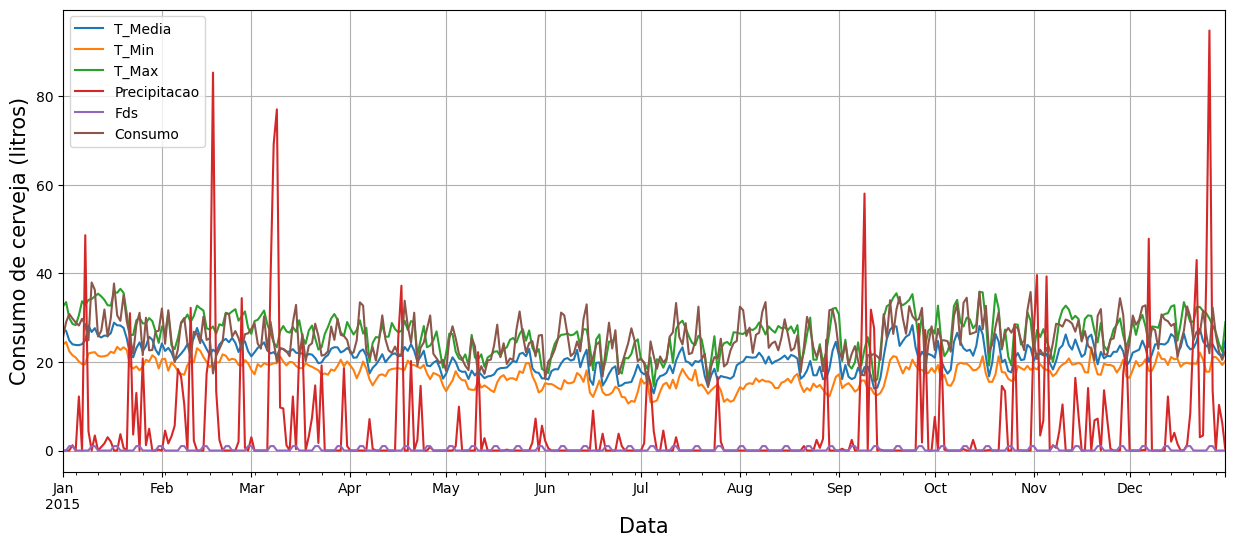

In [ ]:
df.plot(x='Data')
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Consumo de cerveja (litros)',fontsize = 15)
plt.grid()

In [ ]:
df['Mes'] = df['Data'].dt.strftime('%Y-%m')
df_mes = df.groupby(df['Mes'], as_index=False).mean()
df_mes.head()

<ipython-input-17-9fcba2e06e29>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Mes,T_Media,T_Min,T_Max,Precipitacao,Fds,Consumo
0,2015-01,25.218065,21.148387,31.490323,5.038710,0.290323,28.677645
1,2015-02,23.555000,19.935714,29.007143,9.750000,0.285714,25.673143
2,2015-03,22.167097,19.012903,27.248387,10.732258,0.290323,25.036387
3,2015-04,20.837333,17.783333,25.966667,3.603333,0.266667,24.624100
4,2015-05,18.596774,15.612903,22.867742,1.635484,0.322581,22.798387


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

df_mes_acd = df_mes.sort_values(by='T_Min', ascending=True)
trace = go.Scatter(x= df_mes_acd['T_Media'],
                  y = df_mes_acd['Consumo'])

data = [trace]

layout = go.Layout(title='Consumo de Ceveja relacionado à temperatura',
                   xaxis={'title':'Temperatura Media (C)'},
                   yaxis={'title':'Consumo de cerveja (litros)'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
trace = go.Pie(labels=df_consumo_semana['Fds'],
               values=df_consumo_semana['Consumo'])

data = [trace]

layout = go.Layout(title='Consumo em relação ao dia da semana')

fig = go.Figure (data=data, layout=layout)

py.iplot(fig)

In [ ]:
trace = go.Scatter(x = df_mes['Mes'],
                   y = df_mes['Consumo'])

data = [trace]

layout = go.Layout(title='Meses com maiores consumos')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

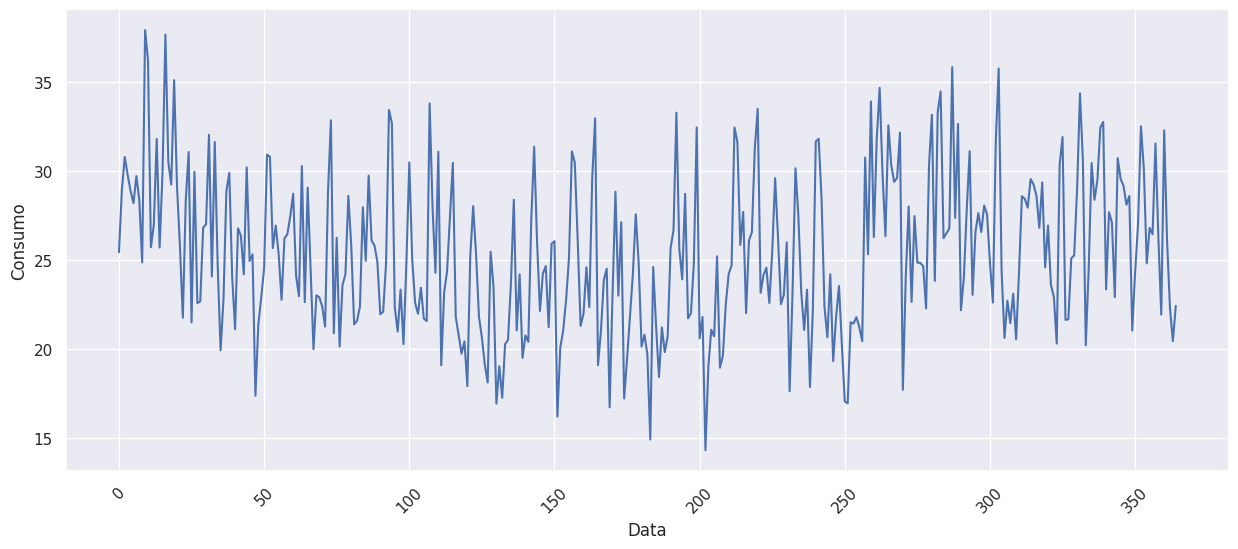

In [ ]:
sns.set()
plt.ylabel('Consumo')
plt.xlabel('Data')
plt.xticks(rotation=45)

plt.plot(df.index, df['Consumo'], )

# Seasonal Decompose

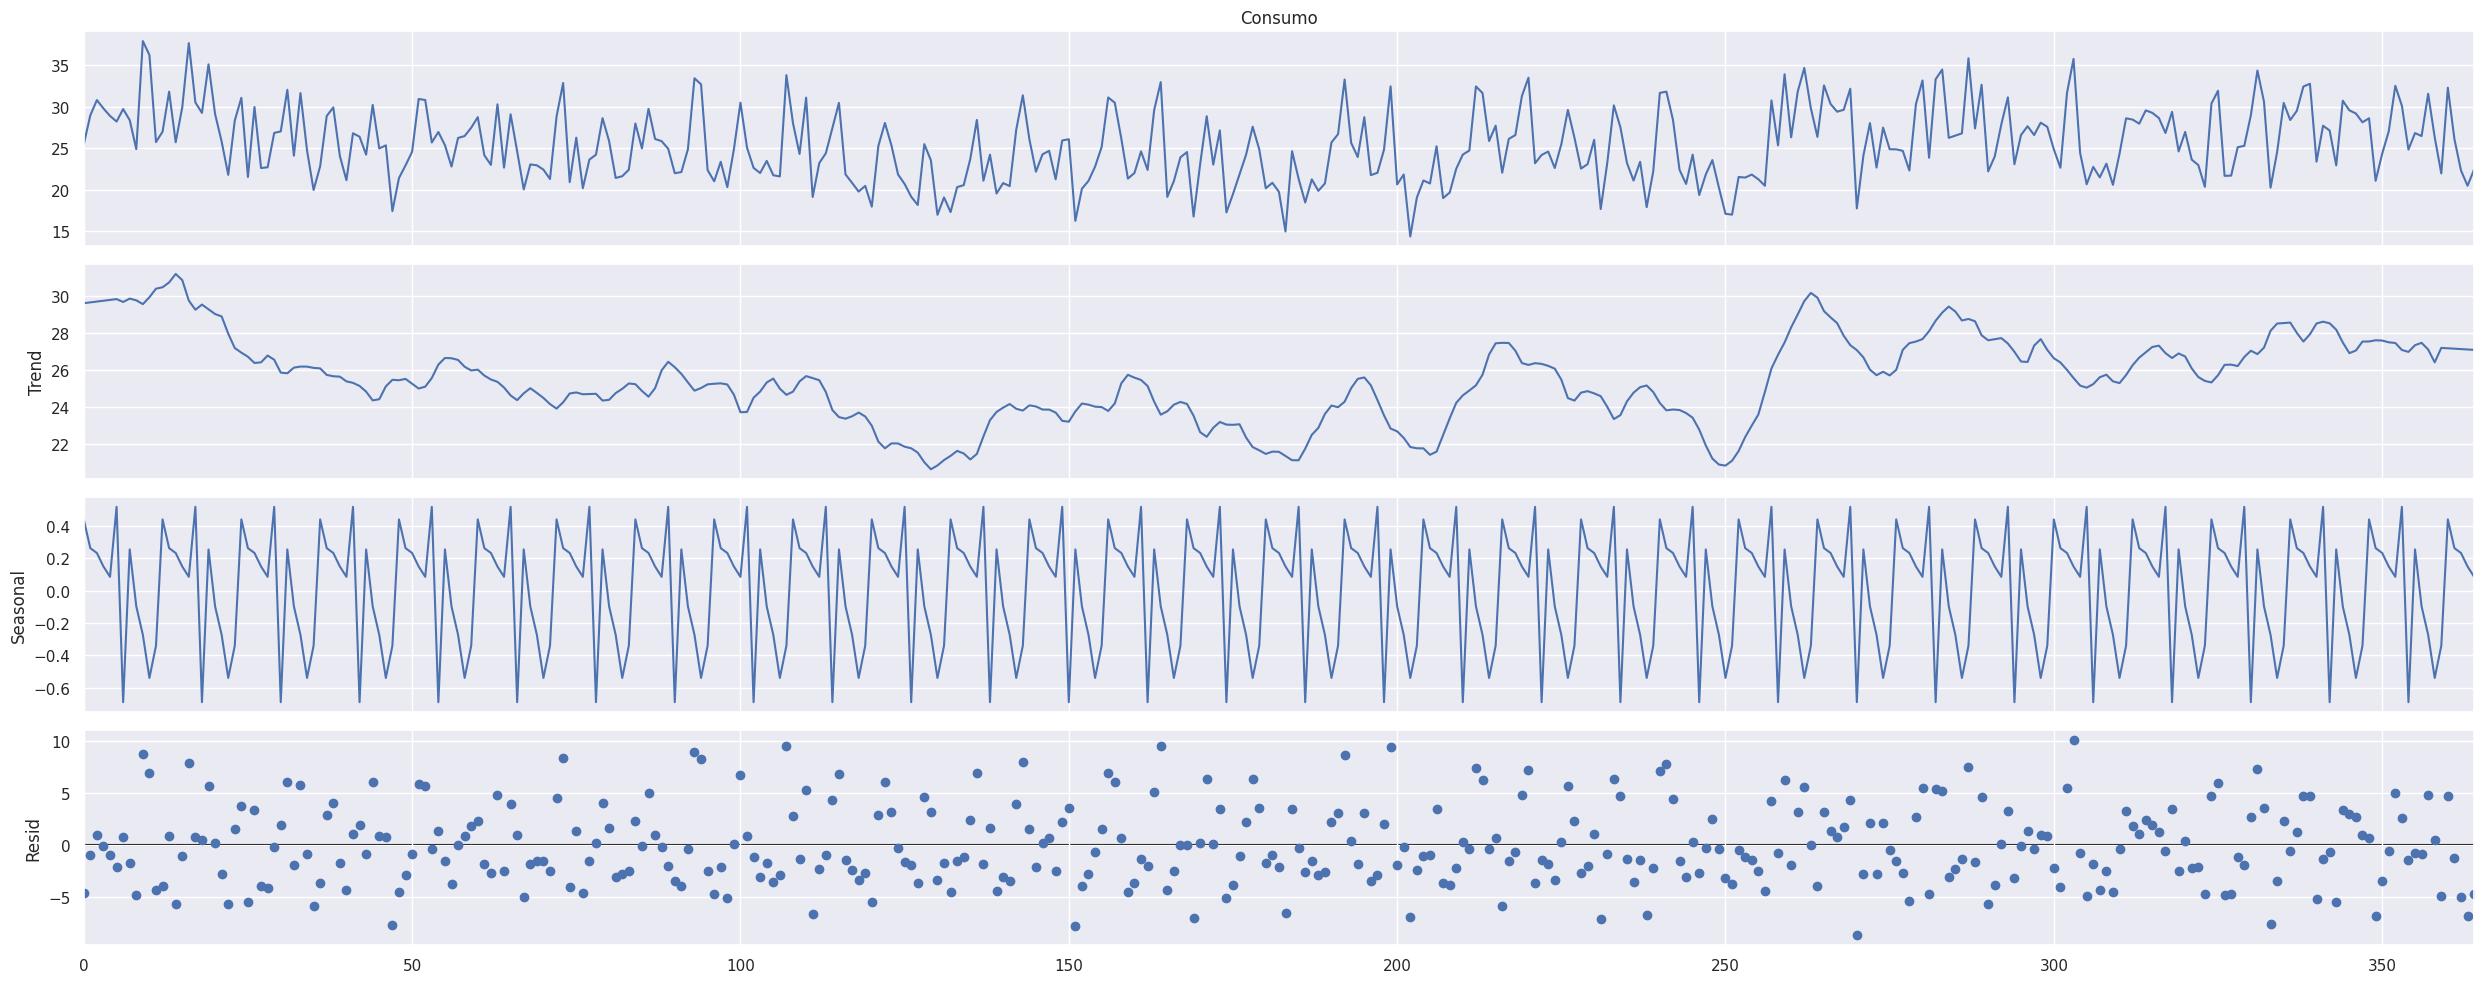

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Consumo'], model = 'additive', extrapolate_trend='freq', period=12)

plt.rcParams.update({'figure.figsize': (25, 10)})
result.plot()
plt.show()

# Linear Regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics  import mean_squared_error,r2_score

In [ ]:
df.head()

,Data,T_Media,T_Min,T_Max,Precipitacao,Fds,Consumo,Dia,Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Quinta,2015-01
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Sexta,2015-01
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Sábado,2015-01
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Domingo,2015-01
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Segunda,2015-01


In [ ]:
X = df.drop(['Data','T_Media','Consumo'],axis=1)
y = df['Consumo'].values

Realização de duas etapas de pré-processamento de dados:


1.   Codificação one-hot: Transforma variáveis categóricas em uma representação numérica.

2.   Padronização: Normaliza as características numéricas para que tenham uma média de 0 e um desvio padrão de 1.
O objetivo dessas etapas de pré-processamento é preparar os dados para serem alimentados em um modelo de aprendizado de máquina, garantindo que eles estejam em um formato adequado e que todas as características estejam na mesma escala. Isso pode melhorar o desempenho e a capacidade de generalização do modelo.




In [ ]:
oneH = OneHotEncoder()
sSC = StandardScaler()

In [ ]:
X = oneH.fit_transform(X).toarray()
X = sSC.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True )

Função que retorna os resultados do modelo

In [ ]:
def info(yTest_, pred_,sg = 'X'):
    ''' Return resultados '''

    print(f'''
{sg}

{'-' * 65}

Mean squared error | {mean_squared_error(yTest_,pred_)}
r2 Score           | {r2_score(yTest_, pred_)}

{'.' * 65}
y-test max         | {y_test.max()}
y-test min         | {y_test.min()}
y-test mean        | {y_test.mean()}
y-test var         | {y_test.var()}
{'.' * 65}

Prediction {sg} max  | {pred_.max()}
Prediction {sg} min  | {pred_.min()}
Prediction {sg} Mean | {pred_.mean()}
Prediction {sg} Var  | {pred_.var()}


{'-' * 65}
''')

Função responsável pelo gráfico da reta de regressão

In [ ]:
def graficos(y, pred):

    # scatter
    plt.figure(figsize=(12, 6))

    plt.plot(y,y)
    plt.scatter(pred,y, c='r', marker='o')
    plt.legend(['Regressão','Datapoints'])
    plt.grid(ls='-.', lw=0.2, c='k');

    # distplot
    plt.figure(figsize=(12, 6))
    sns.distplot(y)
    sns.distplot(pred)
    plt.legend(['Regressão','Datapoints'])
    plt.grid(ls='-.', lw=0.2, c='k')

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lR = LinearRegression()


In [ ]:
%time lR.fit(X_train,y_train)


ValueError: ignored

In [ ]:
%time pred_lR = lR.predict(X_test)


CPU times: user 1.91 ms, sys: 3.95 ms, total: 5.87 ms
Wall time: 4.81 ms


Results

In [ ]:
info(y_test, pred_lR, 'LinearRegression')



LinearRegression

-----------------------------------------------------------------

Mean squared error | 49.55177599590746
r2 Score           | -1.1993452355157168

.................................................................
y-test max         | 37.937
y-test min         | 14.343
y-test mean        | 26.151152173913044
y-test var         | 22.530239998582232
.................................................................

Prediction LinearRegression max  | 50.89828446795666
Prediction LinearRegression min  | 14.31474664466933
Prediction LinearRegression Mean | 26.98056988370091
Prediction LinearRegression Var  | 62.57808801473975


-----------------------------------------------------------------



<ipython-input-54-25c1205ab77a>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-54-25c1205ab77a>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




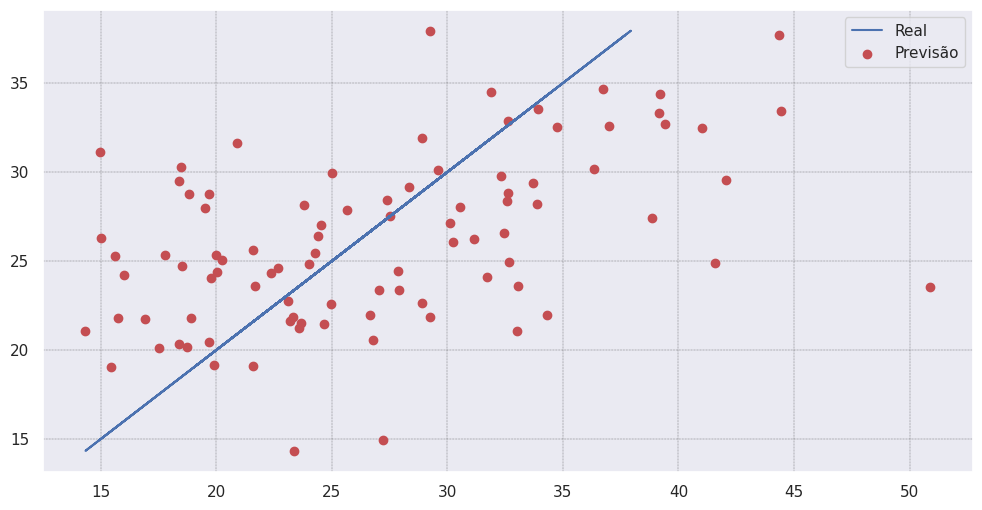

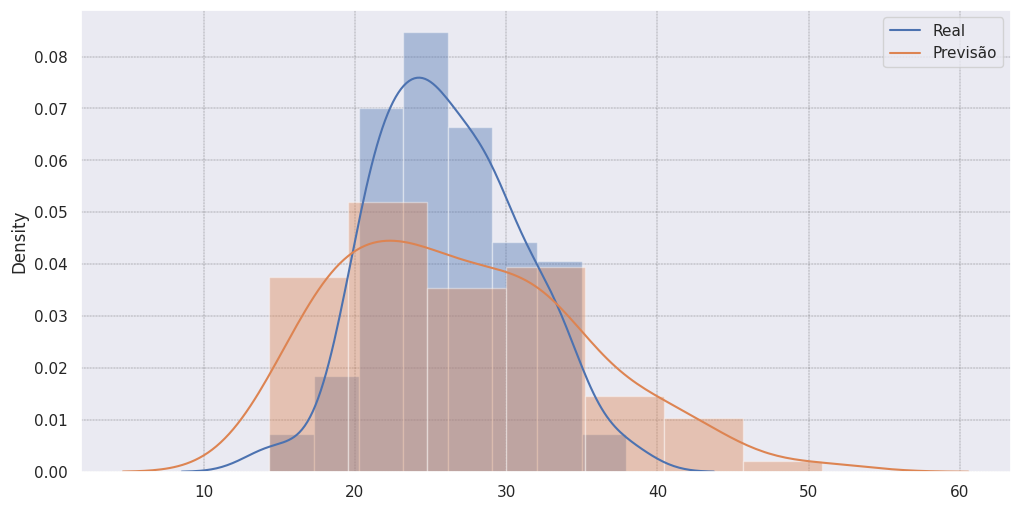

In [ ]:
graficos(y_test, pred_lR)


In [ ]:
data = df[['Consumo']]
data.index = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# AutoArima

Em geral, ao empregar modelos ARIMA, é comum seguir a metodologia Box-Jenkins, composta por um conjunto de etapas (Identificação, Estimação e Diagnóstico dos resíduos) para selecionar o modelo mais apropriado e realizar previsões para uma série temporal. Uma maneira de automatizar parte desse processo é utilizar o AutoARIMA, que determina os melhores valores dos parâmetros p, d e q e, se houver sazonalidade na série, os parâmetros P, D e Q. Embora essa função seja amplamente reconhecida na linguagem R, a biblioteca PMDArima oferece uma alternativa equivalente em Python.

Dessa forma, procederei à seleção dos seguintes parâmetros: p (componente autorregressivo da série, variando de 1 a 6), d (componente de integração, com valor padrão de 1 e no máximo 2), q (componente de médias móveis, variando de 1 a 6), P (componente autorregressivo da sazonalidade, variando de 1 a 2), D (componente de integração da sazonalidade), Q (componente de médias móveis da sazonalidade, variando de 1 a 2) e m (período da sazonalidade, que no nosso caso é 12).

A seguir, aplicaremos o processo do AutoARIMA e armazenaremos o resultado em uma variável, a qual gerará diversos modelos ARIMA juntamente com seus respectivos critérios de informação AIC e BIC.

In [ ]:
stepwise = auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2417.047, Time=0.37 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2264.827, Time=1.81 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.54 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2395.558, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2194.641, Time=2.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=22.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2229.227, Time=0.94 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2165.609, Time=1.64 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2239.406, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.85 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.45 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2159.385, Time=1.52 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=223

In [ ]:
stepwise.aic()

2078.0506427592686

Podemos gerar ainda mais modelos colocando o parâmetro stepwise com False.



In [ ]:
stepwise1=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2417.047, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2279.817, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2229.227, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.89 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=5.96 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.80 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2206.176, Time=0.76 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.64 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2127.21

In [ ]:
stepwise1.aic()


2099.709235429824

train & test

Agora, vamos empregar o AutoARIMA para realizar uma validação do modelo. Para isso, procederemos à divisão dos dados em conjuntos de treinamento e teste. Os dados de treinamento serão utilizados para treinar o AutoARIMA, enquanto os dados de teste serão reservados para a comparação com as previsões geradas. Precisaremos separar as últimas 36 observações para formar o conjunto de teste.

Nesse projeto é aplicada a metodologia Box-Jenkins, que é um abordagem de modelagem de séries temporais multivariadas. Esse tipo de abordagem é bem famosa e muito usada e contempla 4 etapas, que são:

Identificação : iremos identificar os possíveis parâmetros do modelo (p,d,q) por meio de testes estatísticos (teste Dickey-Fuller Aumentado, por exemplo) e ferramentas de análise (função de autocorrelação e função de autocorrelação parcial);

Estimação: Com os parâmetros que selecionados, vamos gerar todos os possíveis modelos ARIMA(p,d,q);

Diagnóstico dos resíduos: Essa é a etapa crucial, pois analisaremos os erros da séries (diferença entre a série original e a série modelada) e os erros/resíduos devem ter uma distribuição normal (teste Jarque-Bera);

Validação : Aqui podemos inserir uma etapa (que não é tão relevante), onde vamos retirar uma parte final da própria série e com os dados que restarem vamos aplicar o modelo encontrado e, por fim, vamos comparar o real com o predito.

Previsão: Após o(s) modelo(s) passarem na etapa anterior, então o modelo pode ser usado para gerar previsões. Caso tenhamos mais de um modelo que passe na etapa de diagnóstico dos resíduos, será escolhido o de menor AIC (Akaike Information Criteria).

In [ ]:
treino=data.loc['2015-01-01':'2015-10-01']
teste=data.loc['2015-10-02':]

In [ ]:
teste

,Consumo
Data,
2015-10-02,27.488
2015-10-03,24.876
2015-10-04,24.862
2015-10-05,24.679
2015-10-06,22.304
...,...
2015-12-27,32.307
2015-12-28,26.095
2015-12-29,22.309


In [ ]:
stepwise.fit(treino)


ARIMA(order=(6, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Vamos gerar as previsões de cada modelo.



In [ ]:
previsao=stepwise.predict(n_periods=36)
previsao1=stepwise1.predict(n_periods=36)


In [ ]:
previsao=pd.DataFrame(previsao,index=teste.index, columns=['previsão modelo 1'])
previsao1=pd.DataFrame(previsao1,index=teste.index, columns=['previsão modelo 2'])


In [ ]:
previsao.head(10)


,previsão modelo 1
Data,
2015-10-02,25.426654
2015-10-03,25.966666
2015-10-04,28.705837
2015-10-05,27.241972
2015-10-06,26.196627
2015-10-07,25.180891
2015-10-08,23.667531
2015-10-09,32.432953
2015-10-10,26.039330


In [ ]:
previsao1.head(10)

,previsão modelo 2
Data,
2015-10-02,NaN
2015-10-03,NaN
2015-10-04,NaN
2015-10-05,NaN
2015-10-06,NaN
2015-10-07,NaN
2015-10-08,NaN
2015-10-09,NaN
2015-10-10,NaN


Comparando graficamente os valores reais com as previsões, vemos que os resultados das previsões parecem acompanhar o valores reais.

<Figure size 2000x500 with 0 Axes>

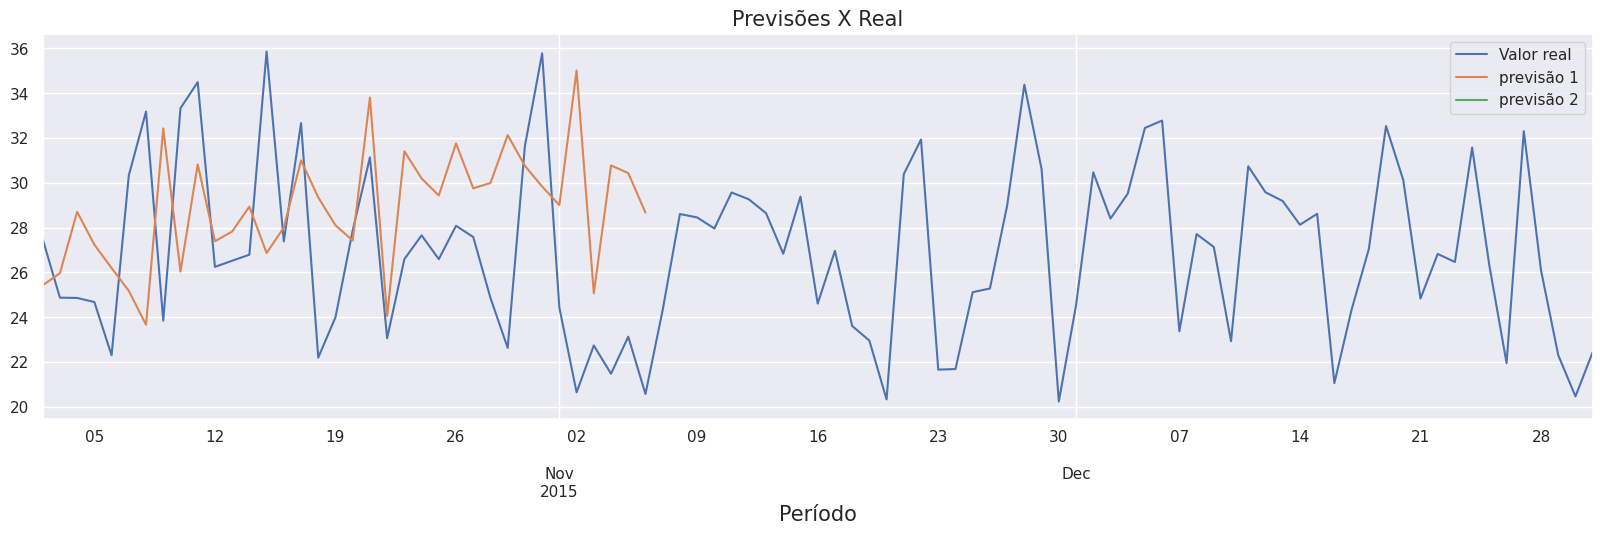

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao, previsao1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1','previsão 2']);

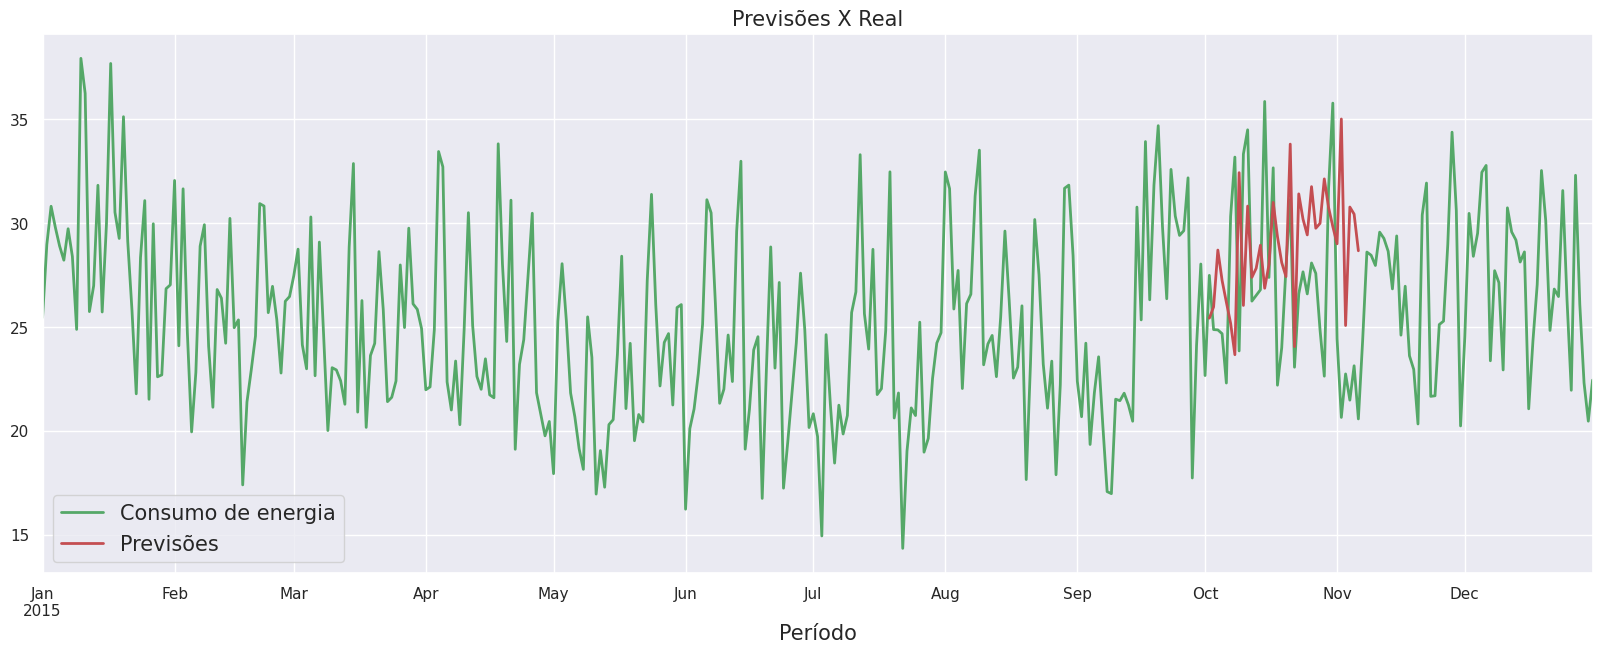

In [ ]:
pd.concat([data,previsao, previsao1],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Consumo de energia','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();

Sumário do Modelo

Aqui estão os resumos dos modelos, incluindo seus coeficientes, estatísticas e valores-p. Todos os parâmetros apresentaram significância estatística, o que indica que eles são estatisticamente diferentes de zero.

In [ ]:
stepwise.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  274
Model:             SARIMAX(6, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -758.264
Date:                            Mon, 18 Sep 2023   AIC                           1534.528
Time:                                    09:28:18   BIC                           1566.609
Sample:                                01-01-2015   HQIC                          1547.423
                                     - 10-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6395      0.064    -10.066      0.000      -0.764      -0.515
ar.L2         -0.5789      0.064     -9.058      0.000      -0.704      -0.454
ar.L3         -0.4983      0.072     -6.910      0.000      -0.640      -0.357
ar.L4         -0.6085      0.066     -9.219      0.000      -0.738      -0.479
ar.L5         -0.4900      0.063     -7.721      0.000      -0.614      -0.366
ar.L6         -0.3637      0.058     -6.295      0.000      -0.477      -0.250
ar.S.L12      -0.8633      0.068    -12.654      0.000      -0.997      -0.730
ar.S.L24      -0.3690      0.062     -5.904      0.000      -0.491      -0.247
sigma2        18.6489      1.724     10.816      0.000      15.270      22.028
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.55   Prob(JB):                         0.97
Heteroskedasticity (H):               1.43   Skew:                            -0.04
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -1044.855
Date:                             Mon, 18 Sep 2023   AIC                           2099.709
Time:                                     09:28:18   BIC                           2119.027
Sample:                                 01-01-2015   HQIC                          2107.397
                                      - 12-31-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3316      0.055      6.058      0.000       0.224       0.439
ma.L1         -0.9857      0.012    -85.589      0.000      -1.008      -0.963
ar.S.L12      -0.7861      0.057    -13.824      0.000      -0.898      -0.675
ar.S.L24      -0.4145      0.053     -7.810      0.000      -0.519      -0.311
sigma2        21.3559      1.713     12.469      0.000      17.999      24.713
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.33
Prob(Q):                              0.92   Prob(JB):                         0.11
Heteroskedasticity (H):               1.14   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Valores Treinados

Para obter os valores treinados, você pode usar a biblioteca Statsmodels e treinar um modelo SARIMAX com os parâmetros que a função autoARIMA definiu. Abaixo, é apresentado um gráfico com as séries dos valores de treinamento e a série com os valores treinados pelo modelo SARIMAX.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



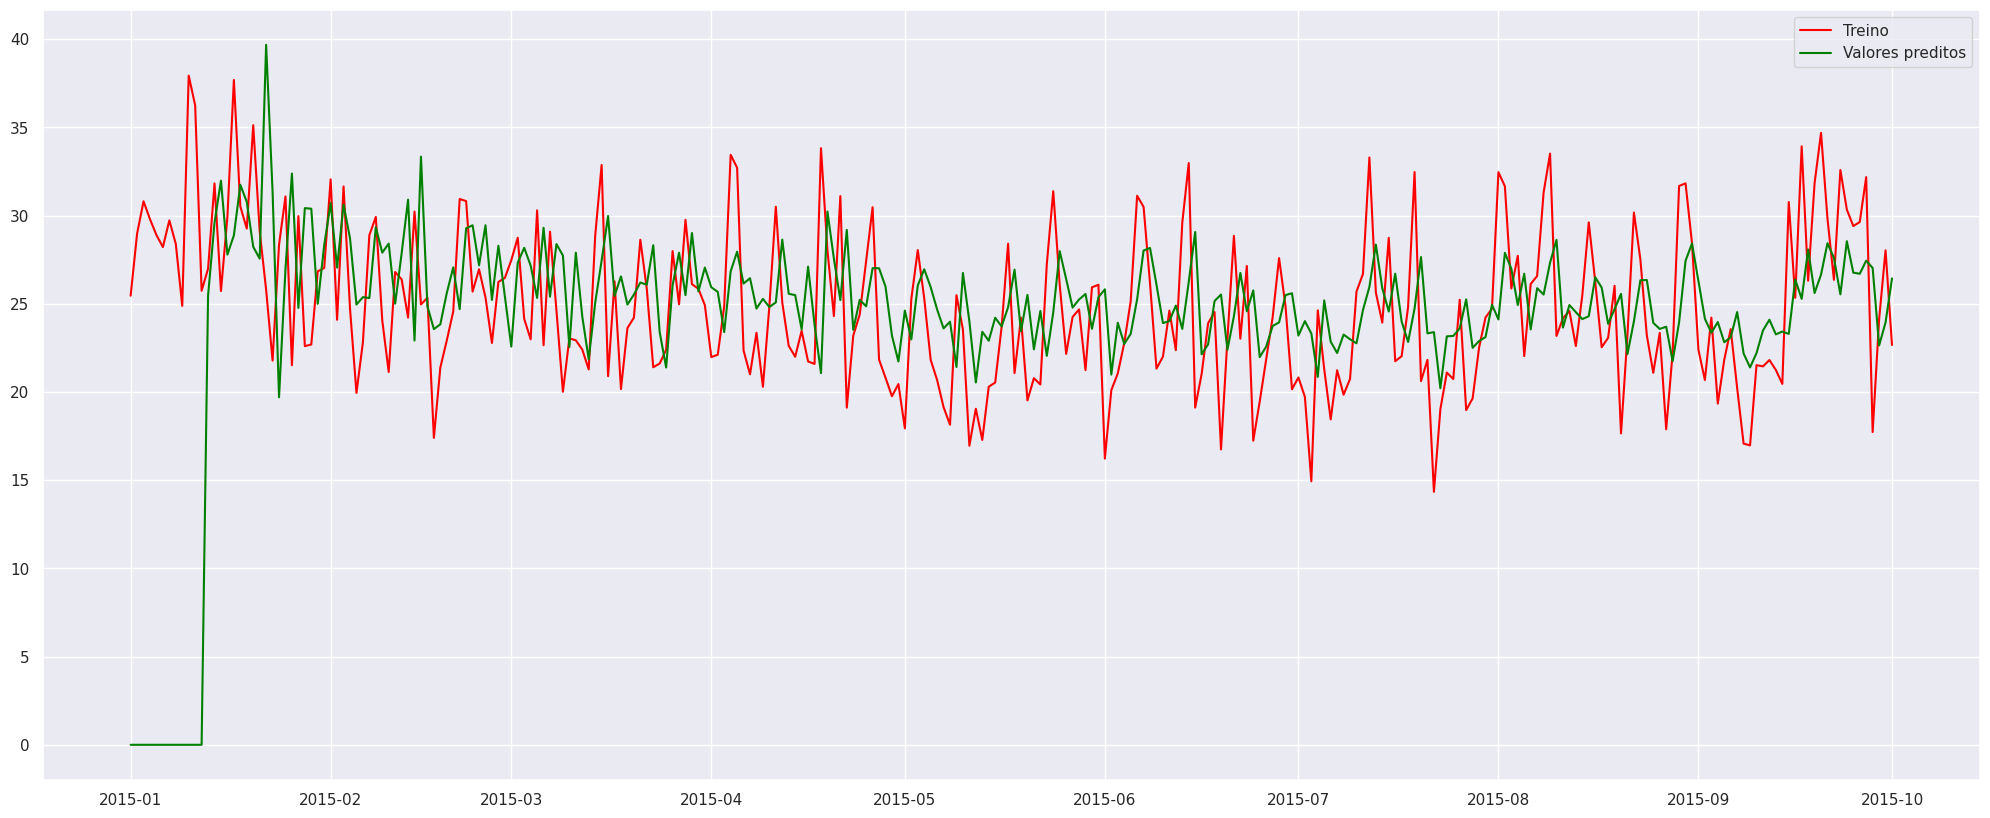

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(treino, order=(1, 0, 1), seasonal_order=(0, 1, 1, 12)).fit(disp=0)

predito = modelo.predict(typ='levels')
plt.plot(treino, color='red')
plt.plot(predito,color='green')
plt.legend(['Treino','Valores preditos']);

É possível aproveitar todas as funcionalidades do modelo SARIMAX, incluindo a análise da Impulso-Resposta, que avalia o impacto das variáveis na própria série de produção de energia elétrica. Abaixo, é exibida a Impulso-Resposta para um período de 40 observações da série.

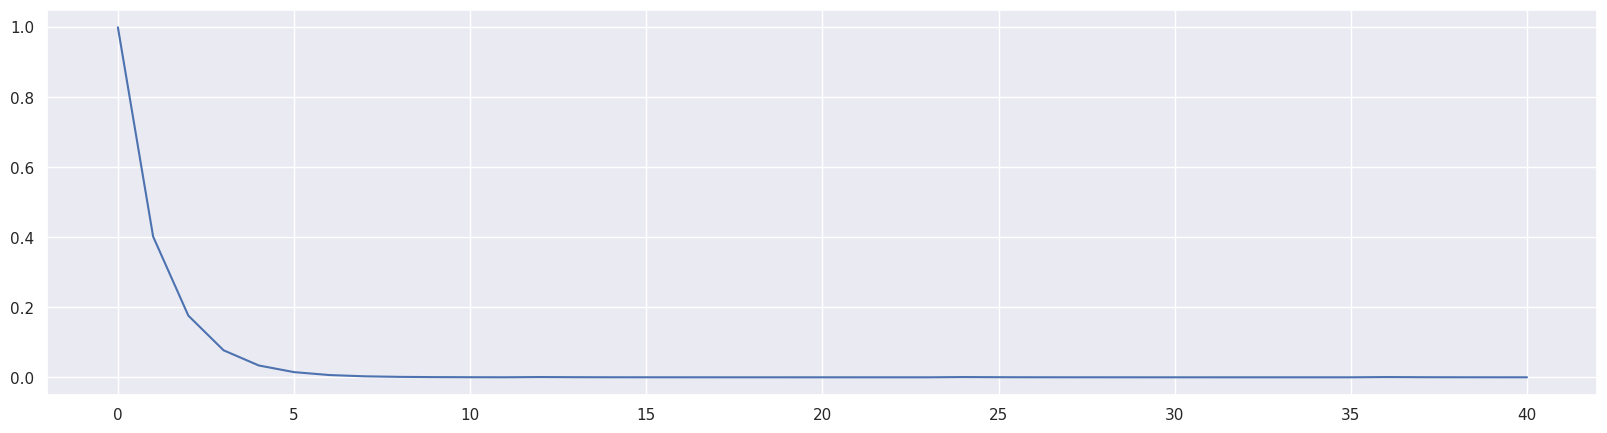

In [ ]:
modelo.impulse_responses(steps=40).plot(figsize=(20,5));


Gráfico e análise de resíduos

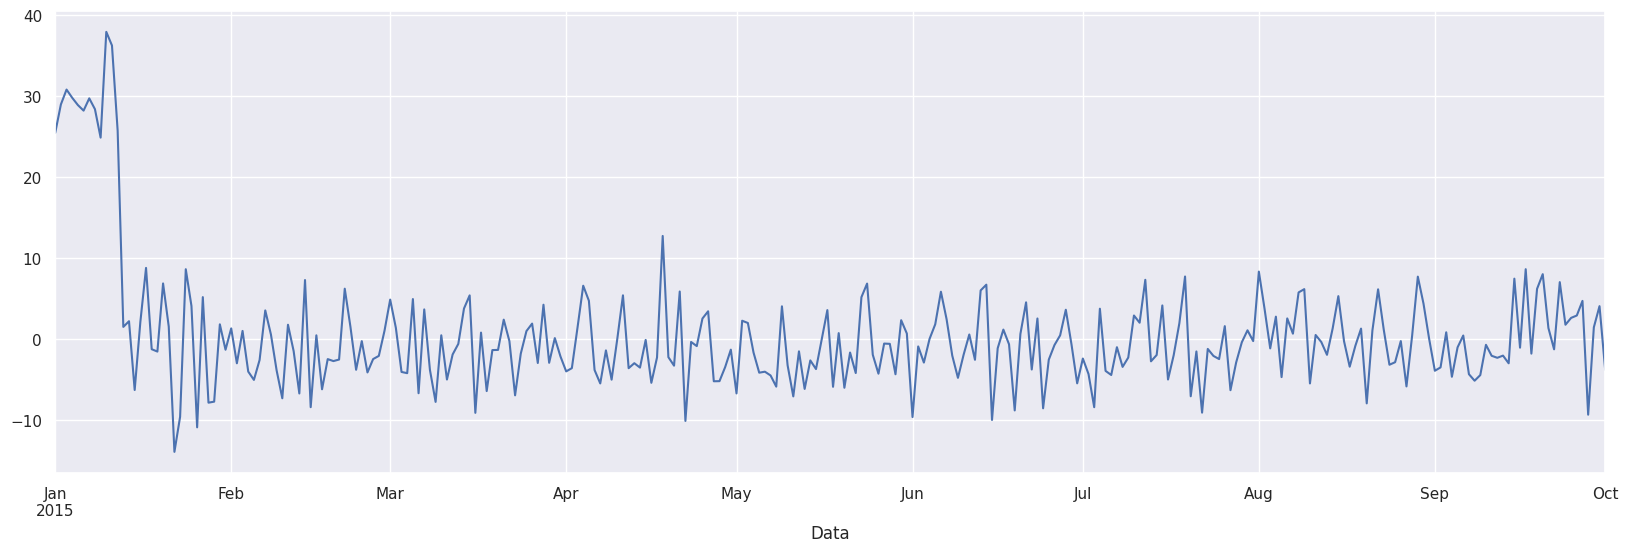

In [ ]:
(treino['Consumo'] - pd.DataFrame(predito)['predicted_mean']).plot(figsize=(20,6));


No caso do modelo stepwise, os resíduos parecem flutuar em torno do valor zero, e o histograma dos resíduos exibe uma forma aproximadamente gaussiana (formato de sino). A sobreposição do KDE (estimativa de densidade kernel) do histograma com uma distribuição normal é uma indicação de que os resíduos podem seguir uma distribuição normal. O gráfico QQ mostra que a maioria dos valores está alinhada com a linha vermelha, o que sugere normalidade nos resíduos. Além disso, o correlograma não revela resultados estatisticamente significativos, o que indica a ausência de autocorrelação serial nos resíduos.

Esses são indicadores positivos da qualidade do modelo, sugerindo que os resíduos se comportam de forma adequada e estão consistentes com as suposições do modelo SARIMAX.

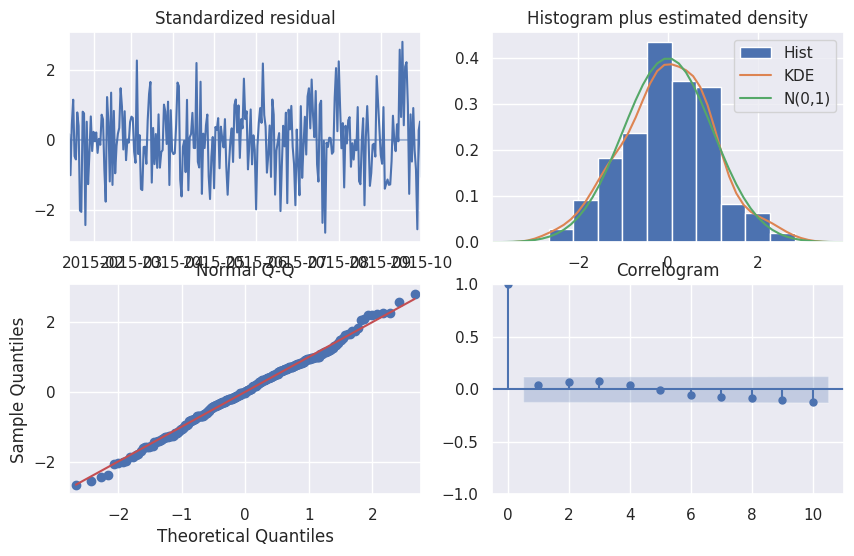

In [ ]:
stepwise.plot_diagnostics(figsize=(10,6));


Previsão

In [ ]:
stepwise.fit(data)


ARIMA(order=(6, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Vamos criar 24 previsões para um futuro fora da séries original.



In [ ]:
previsao2=stepwise.predict(n_periods=36)
previsao2=pd.DataFrame(previsao,
                              index=pd.date_range(start='2015-01-01',
                                                  end='2015-12-31', freq='MS'),
                              columns=['nova previsão'])

<Figure size 2000x500 with 0 Axes>

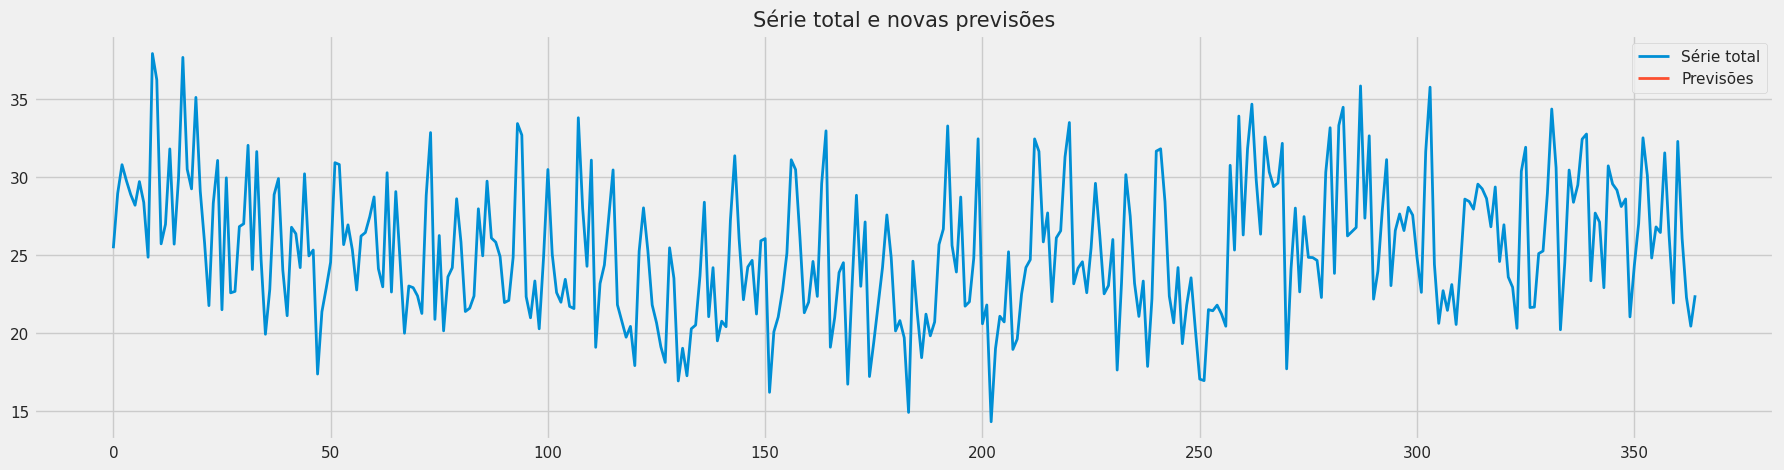

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([data,previsao2],axis=1).plot(figsize=(20,5), linewidth=2)
plt.xlabel('')
plt.title('Série total e novas previsões',size=15)
plt.legend(['Série total','Previsões'])
plt.show();

# Redes Neurais LSTM

In [ ]:

import pandas_datareader as web
import math
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [ ]:

#Da série vamos extrair apenas os dados de fechamento
data=df.filter(['Consumo'])
#selecionar seus valores
dataset=data.values
#separa 80% desses dados
training_data_len=math.ceil(len(dataset)*.8)
#e vamos visualizar quantas observações temos
training_data_len

In [ ]:
#escalando para o intervalo entre 0 e 1
scaler=MinMaxScaler(feature_range=(0,1))

#transformando os dados
scaled_data = scaler.fit_transform(dataset)

#dados transformados para a escala que escolhemos
scaled_data


In [ ]:
#criando um dataset de treino
train_data = scaled_data[0:training_data_len,:]
#separando dados de treino e teste
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.4712215 , 0.62003052, 0.69810121, 0.6550818 , 0.61697889,
       0.58807324, 0.6522421 , 0.59565991, 0.44685089, 1.        ,
       0.92866831, 0.48317369, 0.53602611, 0.74095109, 0.4823684 ,
       0.66097313, 0.98953124, 0.68580995, 0.63244893, 0.88090192,
       0.62672713, 0.48537764, 0.31537679, 0.59358311, 0.70971433,
       0.30418751, 0.66241417, 0.35008901, 0.35403069, 0.52988048,
       0.53772145, 0.7507841 , 0.41341019, 0.73374587, 0.44057811,
       0.23764516, 0.35932864, 0.61668221, 0.66046452, 0.41192676,
       0.28795456, 0.52818513, 0.51055353, 0.418581  , 0.67339154,
       0.45032635, 0.46622023, 0.12952446, 0.2987624 , 0.36360939,
       0.43333051, 0.7035687 , 0.69856743, 0.48101212, 0.53471221,
       0.46719505, 0.35776045, 0.50428075, 0.51385946, 0.55658218])]
[0.6105789607527339]

[array([0.4712215 , 0.62003052, 0.69810121, 0.6550818 , 0.61697889,
       0.58807324, 0.6522421 , 0.59565991, 0.44685089, 1.        ,
       0.92866831, 0.48317369, 0.536

Convertendo em arrays do numpy

In [ ]:

x_train,y_train = np.array(x_train), np.array(y_train)
#dimensões dos arrays
print(x_train.shape)
print(y_train.shape)

(232, 60)
(232,)


Redimensionando os Dados

In [ ]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(232, 60, 1)

Criando uma base teste

In [ ]:
#criando os dados de teste
test_data=scaled_data[training_data_len-60:,:]

#criando x_test e y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

Criando o modelo


In [ ]:

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mse')


Treinando o Modelo

In [ ]:
model.fit(x_train, y_train, batch_size=100,epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
3/3 [==============================] - 5s 505ms/step - loss: 0.1902 - val_loss: 719.8699
Epoch 2/10
3/3 [==============================] - 0s 88ms/step - loss: 0.1057 - val_loss: 709.9336
Epoch 3/10
3/3 [==============================] - 0s 99ms/step - loss: 0.0440 - val_loss: 695.5331
Epoch 4/10
3/3 [==============================] - 0s 97ms/step - loss: 0.0495 - val_loss: 694.8456
Epoch 5/10
3/3 [==============================] - 0s 88ms/step - loss: 0.0417 - val_loss: 701.3553
Epoch 6/10
3/3 [==============================] - 0s 83ms/step - loss: 0.0341 - val_loss: 705.1395
Epoch 7/10
3/3 [==============================] - 0s 83ms/step - loss: 0.0376 - val_loss: 705.9157
Epoch 8/10
3/3 [==============================] - 0s 89ms/step - loss: 0.0376 - val_loss: 704.5204
Epoch 9/10
3/3 [==============================] - 0s 83ms/step - loss: 0.0348 - val_loss: 702.2960
Epoch 10/10
3/3 [==============================] - 0s 91ms/step - loss: 0.0338 - val_loss: 700.3308


Sumário do Modelo

In [ ]:
model.summary()


Gerando Previsões

In [ ]:
predictions = model.predict(x_test)
#invertendo a escala
predictions = scaler.inverse_transform(predictions)

Métricas de avaliação

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error


In [ ]:
print('Erro médio absoluto :', mean_absolute_error(predictions,y_test))
print('Erro médio quadrado logarítmico :', mean_squared_log_error(predictions,y_test))
print('Erro medio quadrado :', mean_squared_error(predictions,y_test))
print('Coeficiente de determinação (R²):', r2_score(predictions,y_test))


Erro médio absoluto : 3.2170049843984105
Erro médio quadrado logarítmico : 0.01961266710649111
Erro medio quadrado : 14.705703521877595
Coeficiente de determinação (R²): -58.10141517336826


Gráfico de Previsões VS Valores Reais

In [ ]:

#plotando os dados
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions


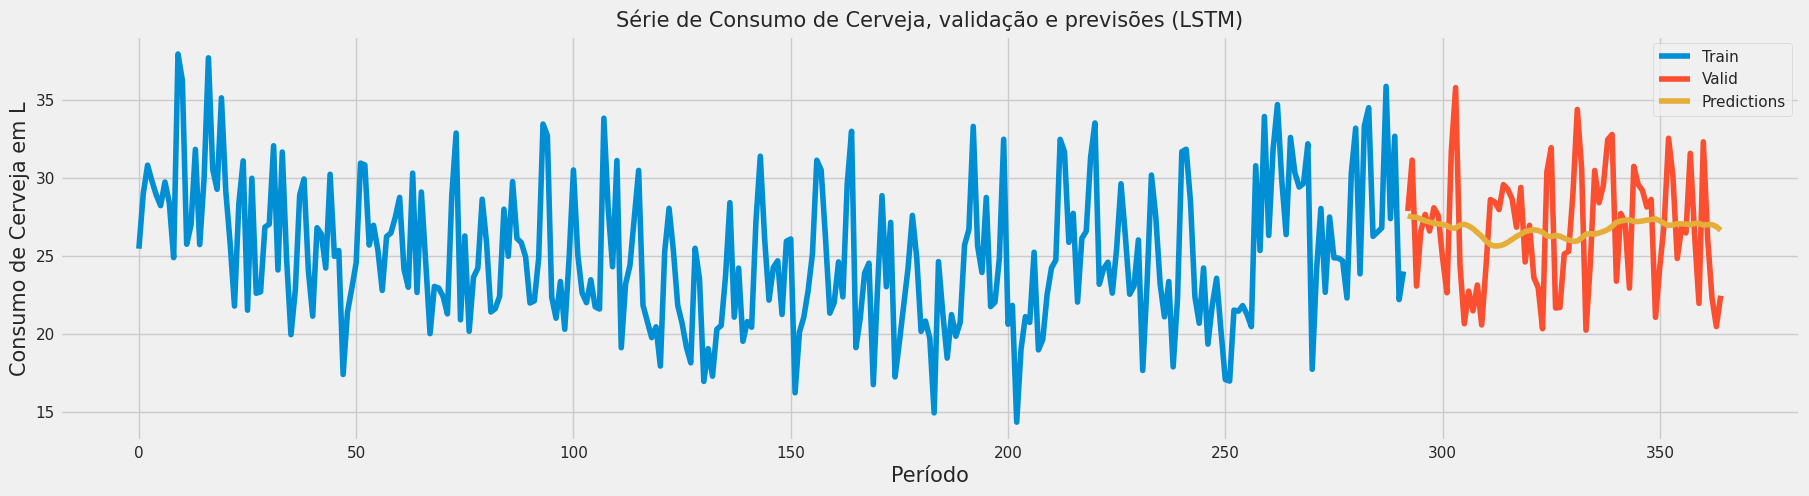

In [ ]:

plt.figure(figsize=(20,5))
plt.title('Série de Consumo de Cerveja, validação e previsões (LSTM)',size=15)
plt.xlabel('Período',size=15)
plt.ylabel('Consumo de Cerveja em L',size=15)
plt.plot(train['Consumo'])
plt.plot(valid[['Consumo','Predictions']])
plt.legend(['Train','Valid','Predictions'])
plt.show()

Gerando Previsão do Modelo

In [ ]:
#selecionando todos os dados de fechamento e redimensionando-os
dados_fechamento = df['Consumo'].values.reshape((-1))

#criando uma função para gerar as previsões
def predict(numero_previsoes, modelo):
    lista_prev = dados_fechamento[-60:]

    for _ in range(numero_previsoes):
        x = lista_prev[-60:]
        x = x.reshape((1, 60, 1))
        out = model.predict(x)[0][0]
        lista_prev = np.append(lista_prev, out)
    lista_prev = lista_prev[60-1:]

    return lista_prev

#Criando uma função para as datas das previsões
def predict_dates(numero_previsoes):
    ultima_data = df.index.values[-1]
    data_prev = pd.date_range(ultima_data, periods=numero_previsoes+1).tolist()
    return data_prev

#número de períodos
numero_previsoes = 60
previsoes = predict(numero_previsoes, model)
forecast_dates = predict_dates(numero_previsoes)

1/1 [==============================] - 0s 28ms/step


Plotando a série e suas previsões

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/consumo.csv')


In [ ]:
import numpy as np

main_df2 = np.array([])
for df2 in pd.read_csv('/content/drive/MyDrive/consumo.csv', chunksize = 100):
    df2.columns = ['Data', 'T_Media', 'T_Min', 'T_Max', 'Precipitacao', 'Fds', 'Consumo', 'Dia', 'Mes']
    ids = df.consumo()
    main_df = np.append(main_df,ids)
uniqueids = pd.unique(main_df.flatten())
number_of_uniqueids = len(uniqueids)
print("Number of Unique Ids:", number_of_uniqueids)

In [ ]:
df2

In [ ]:
predicoes = pd.DataFrame(previsoes, index=forecast_dates, columns=['Previsões'])


In [ ]:
plt.figure(figsize=(20,5))
plt.title('Série de preços de fechamento, validação e previsões (LSTM)',size=15)
plt.xlabel('Período',size=15)
plt.ylabel('Preços de fechamento em US$',size=15)
plt.plot(df['Consumo'])
plt.plot(predicoes['Previsões'])
plt.plot(df2)
plt.legend(['Treino','Validação','Predições'])
plt.show()


# Lazy Prediction

In [ ]:
!pip install scikit-learn==0.22

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/consumo.csv')
X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
